In [5]:
import requests
from bs4 import BeautifulSoup
import datetime
import pandas as pd
from tqdm import tqdm
import regex as re
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

In [7]:
### read tables from pkl
with open('/Users/euan_brown/Documents/GitHub/NCAA-fh-project/tables.pkl', 'rb') as f:
    data = pickle.load(f)

schedule_table, pbp_table, box_table, player_table = data[0], data[1], data[2], data[3]


In [8]:
box_table[box_table.player_name.str.contains('Matson, Erin')].sum()

player_name        Matson, ErinMatson, ErinMatson, ErinMatson, Er...
pos                                                     FFFFFFFFFFFF
goals                                                           28.0
ast                                                             10.0
shatt                                                          116.0
sog                                                             82.0
fouls                                                            0.0
rc                                                               0.0
yc                                                               1.0
gc                                                               3.0
ggp                                                              0.0
ggs                                                              0.0
min                                                                 
ga                                                               0.0
sv                                

In [9]:
box_table[box_table.player_name.str.contains('Sessa, Ashley')].sum()

player_name        Sessa, AshleySessa, AshleySessa, AshleySessa, ...
pos                                               FMMFF/MMFFFFF/MF/M
goals                                                            9.0
ast                                                              5.0
shatt                                                           52.0
sog                                                             38.0
fouls                                                            0.0
rc                                                               0.0
yc                                                               0.0
gc                                                               2.0
ggp                                                              0.0
ggs                                                              0.0
min                                                                 
ga                                                               0.0
sv                                

In [10]:
player_table[player_table.team_name=='North Carolina']

,team_name,player_name,player_ID,team_ID
1265,North Carolina,"Wirth, Paityn",1404,58
1266,North Carolina,"Behan, Brooke",742,58
1267,North Carolina,"Thomassey, Kiersten",1070,58
1268,North Carolina,"Sholder, Meredith",337,58
1269,North Carolina,"Slinkert, Lisa",1671,58
1270,North Carolina,"Weber, Steph",647,58
1271,North Carolina,"Heck, Ryleigh",79,58
1272,North Carolina,"Dixon, Katie",315,58
1273,North Carolina,"Borkowski, Ava",1538,58
1274,North Carolina,"Matson, Erin",167,58


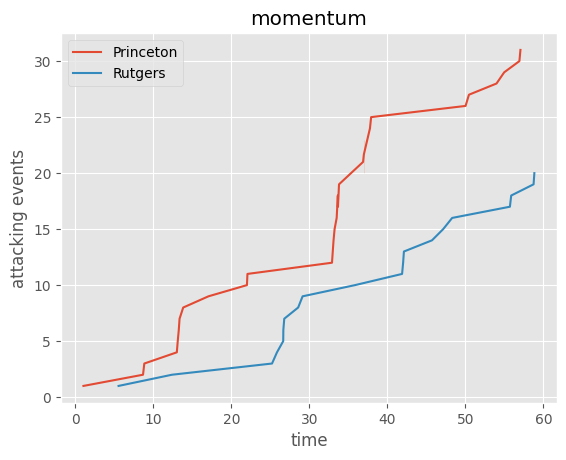

In [11]:
plt.style.use('ggplot')

plot_data = pbp_table[pbp_table['game_ID']==202]
plot_data = plot_data[plot_data['cat_event'].isin(['shot','corner','goal'])]
plot_data = plot_data[['time','home_team_name','away_team_name','home_score','away_score','cat_event','event_team']]
plot_data['pts'] = 1


plot_data_home = plot_data[plot_data['event_team']=='home']
plot_data_away = plot_data[plot_data['event_team']=='away']
plot_data_home['cumsum_pts'] = plot_data_home.pts.cumsum()
plot_data_away['cumsum_pts'] = plot_data_away.pts.cumsum()


fig, ax = plt.subplots()

sns.lineplot(x='time', y='cumsum_pts', data=plot_data_home, ax=ax, label=plot_data_home.home_team_name.unique()[0])
sns.lineplot(x='time', y='cumsum_pts', data=plot_data_away, ax=ax, label=plot_data_away.away_team_name.unique()[0])

ax.set_xlabel('time')
ax.set_ylabel('attacking events')
ax.set_title('momentum')
ax.legend()

plt.show()

In [12]:
# momentum code - very useful

plot_data = pd.concat([plot_data_home,plot_data_away]).sort_values('time')
plot_data['momentum'] = (np.where(plot_data['event_team']=='home',plot_data['pts'],0) - np.where(plot_data['event_team']=='away',plot_data['pts'],0)).cumsum()

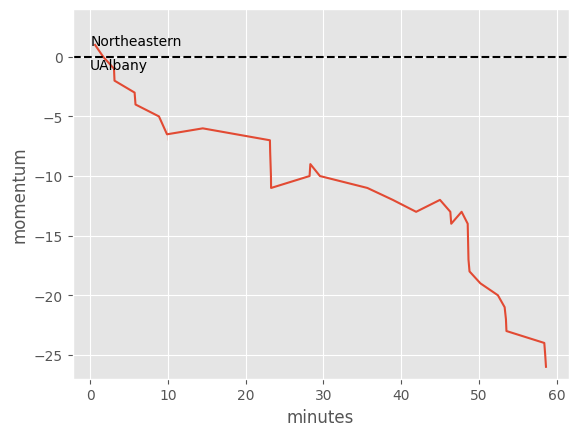

In [13]:
plot_data = pbp_table[pbp_table['game_ID']==35]
plot_data = plot_data[plot_data['cat_event'].isin(['shot','corner','goal'])]
plot_data = plot_data[['time','home_team_name','away_team_name','home_score','away_score','cat_event','event_team']]
plot_data['pts'] = 1

plot_data_home = plot_data[plot_data['event_team']=='home']
plot_data_away = plot_data[plot_data['event_team']=='away']
plot_data_home['cumsum_pts'] = plot_data_home.pts.cumsum()
plot_data_away['cumsum_pts'] = plot_data_away.pts.cumsum()

plot_data = pd.concat([plot_data_home,plot_data_away]).sort_values('time')
plot_data['momentum'] = (np.where(plot_data['event_team']=='home',plot_data['pts'],0) - np.where(plot_data['event_team']=='away',plot_data['pts'],0)).cumsum()

fig, ax = plt.subplots()

if plot_data.momentum.max() < 2:
  ax.set_ylim(plot_data.momentum.min()-1,4)

if plot_data.momentum.min() > -2:
   ax.set_ylim(-4,plot_data.momentum.max()+1)


sns.lineplot(x='time', y='momentum', data = plot_data, ax=ax)

ax.axhline(0, color='black', linestyle='--')

ax.annotate(str(plot_data.home_team_name.unique()[0]),(0,1))
ax.annotate(str(plot_data.away_team_name.unique()[0]),(0,-1))

ax.set_xlabel('minutes')
ax.set_ylabel('momentum')

plt.show()

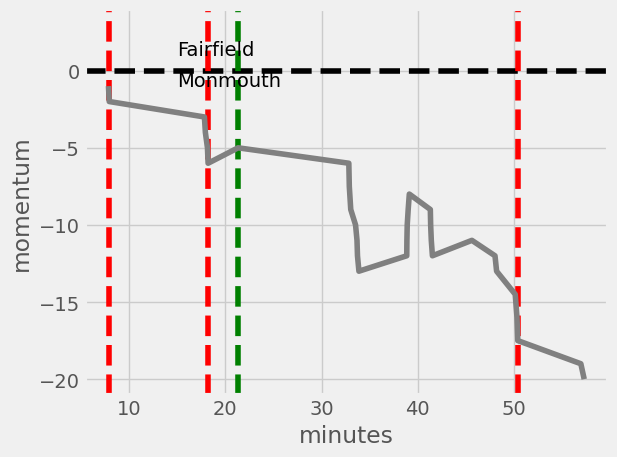

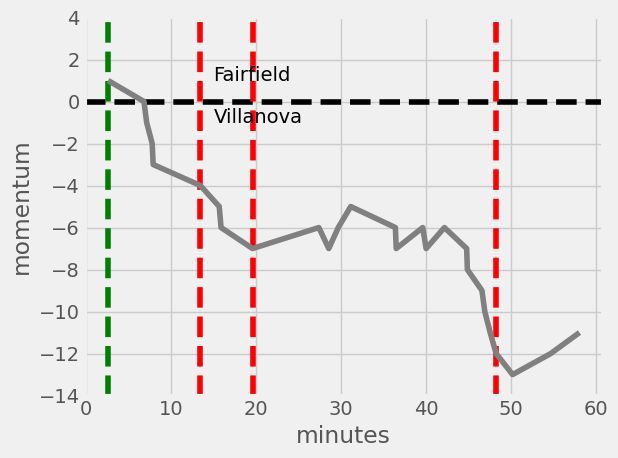

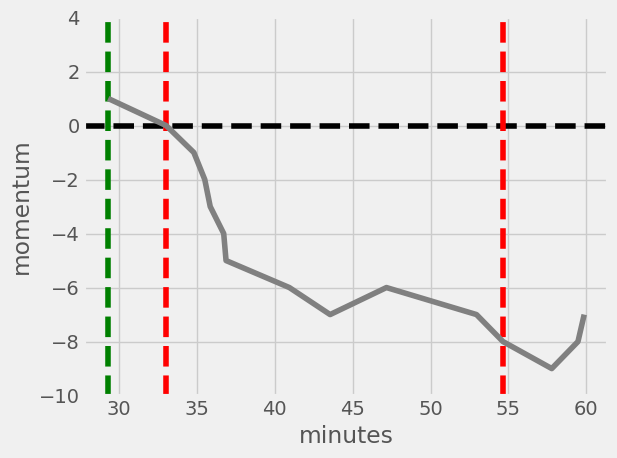

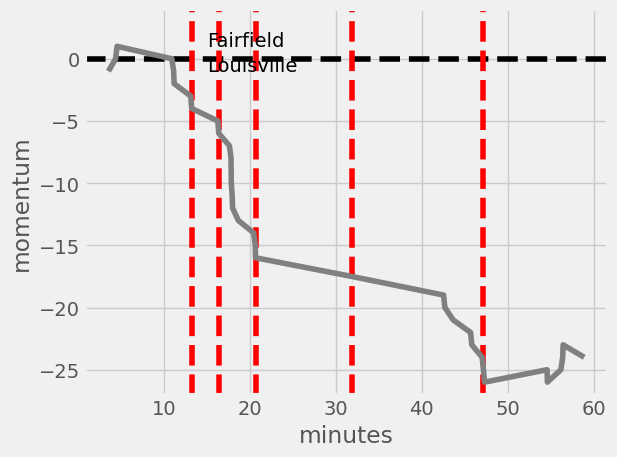

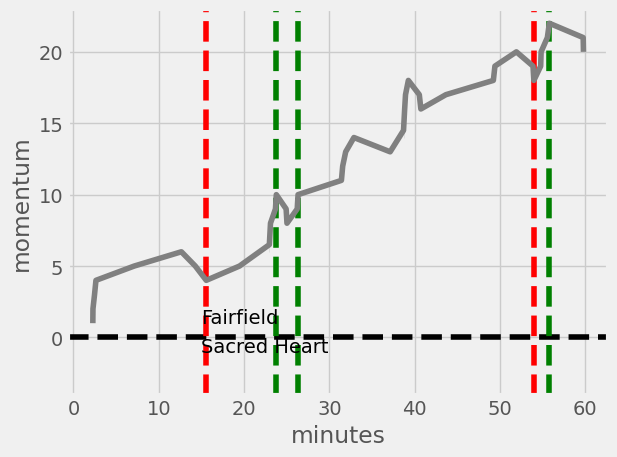

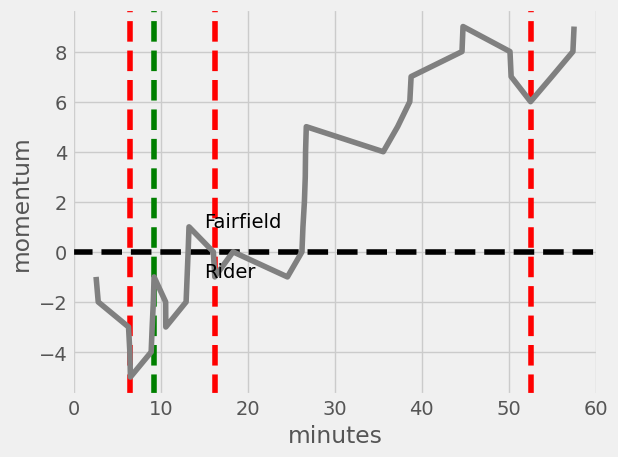

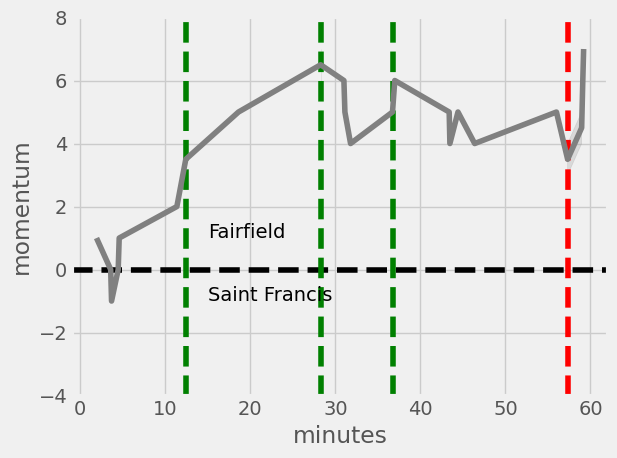

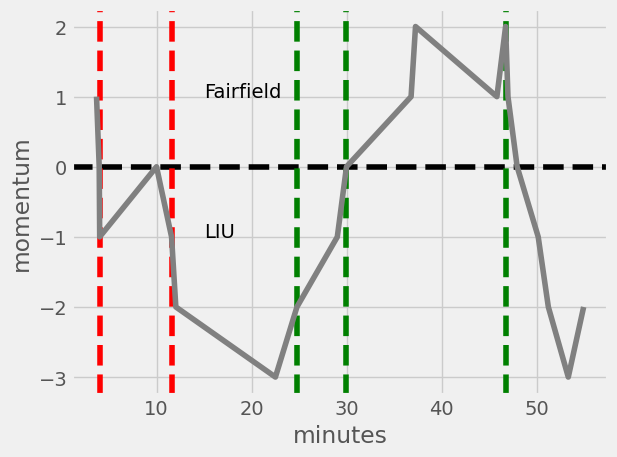

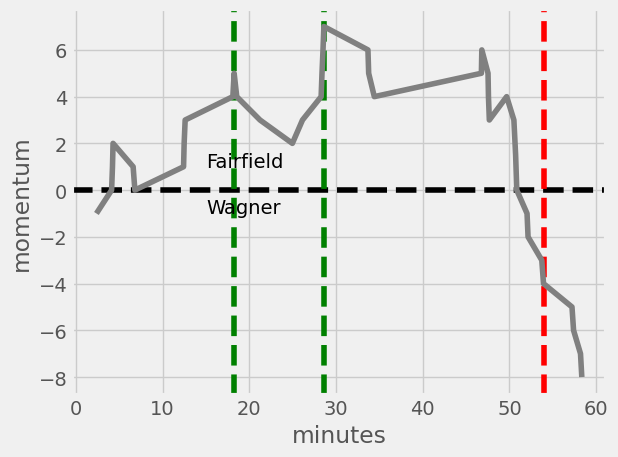

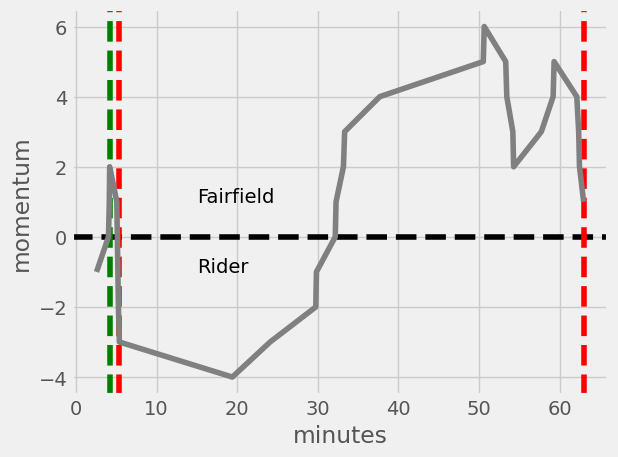

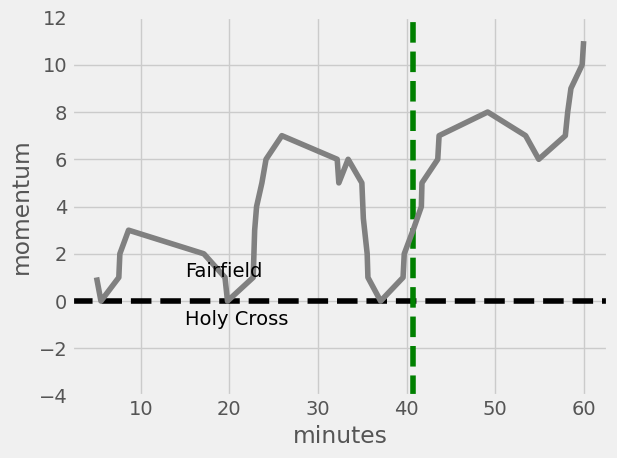

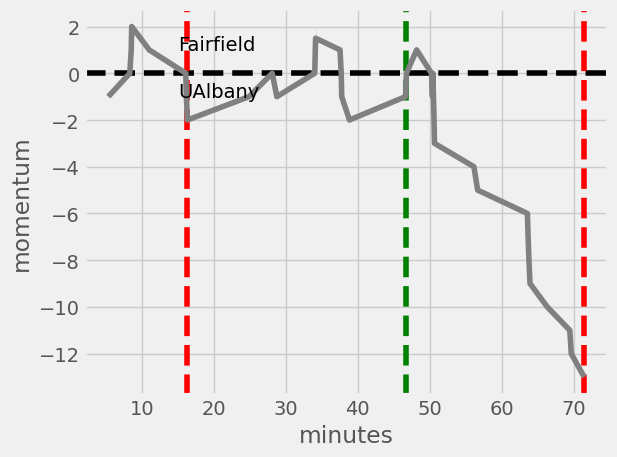

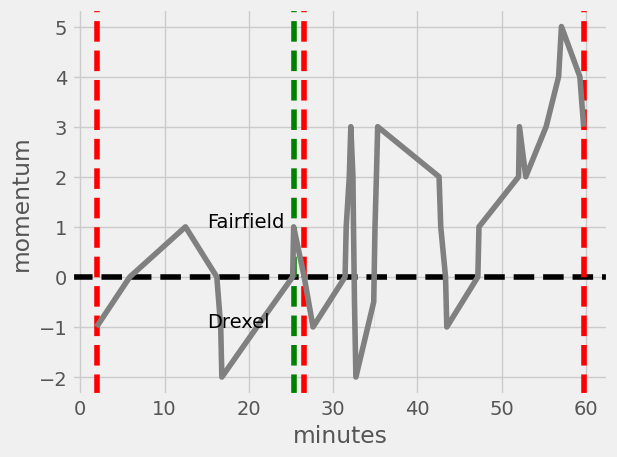

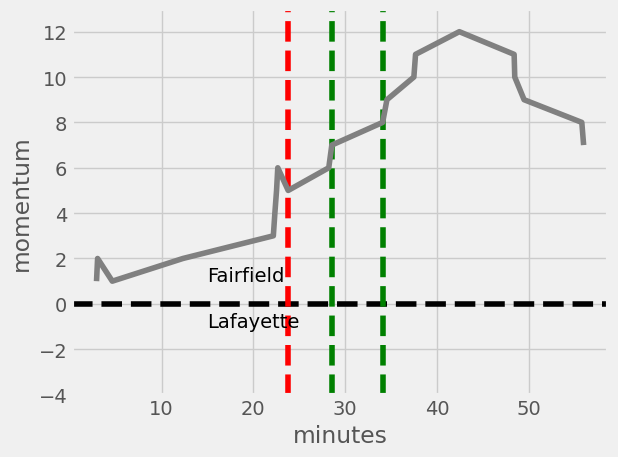

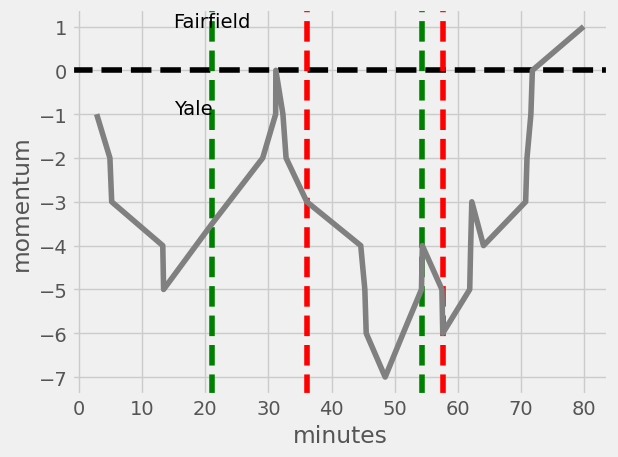

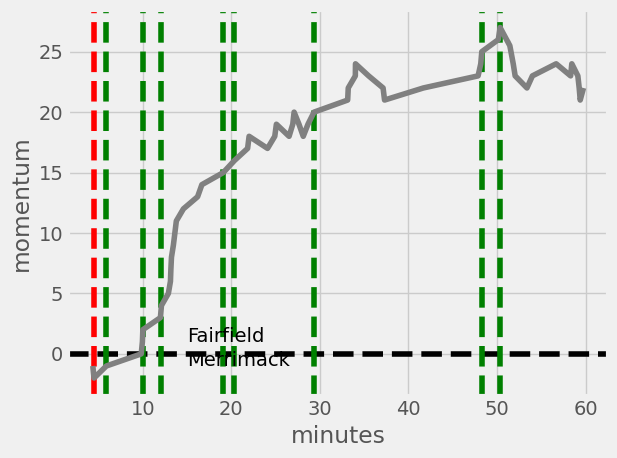

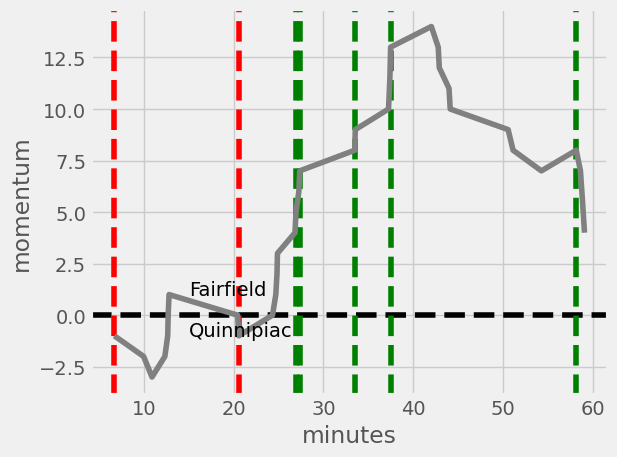

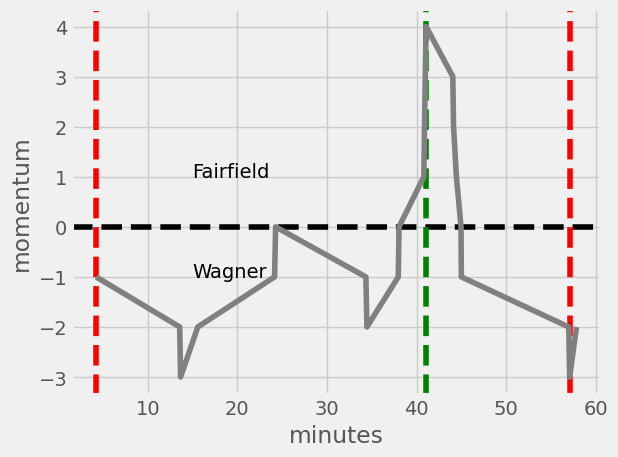

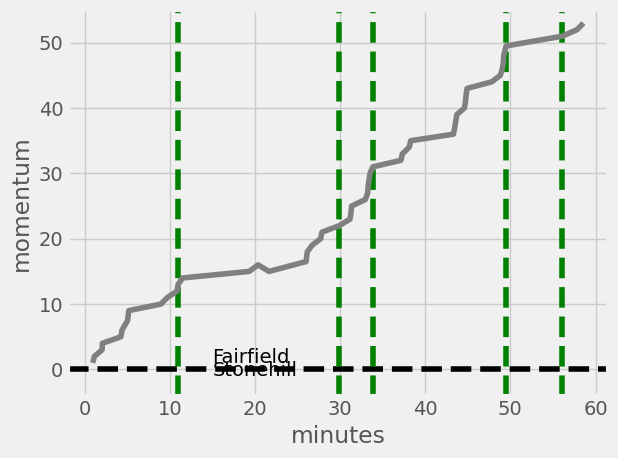

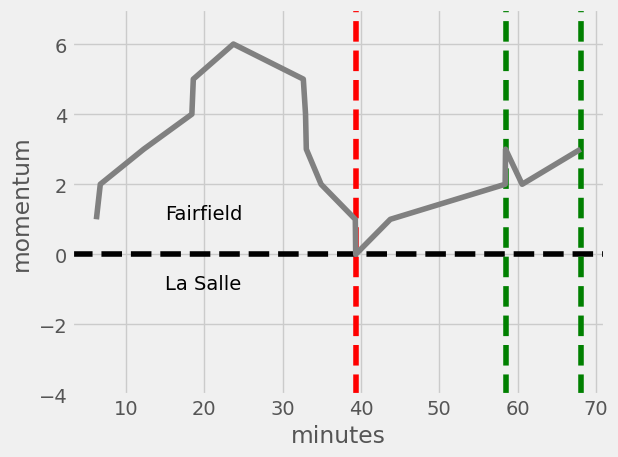

In [15]:
target = 'Fairfield'

plt.style.use('fivethirtyeight')


for ID in pbp_table[pbp_table['home_team_name']==target]['game_ID'].unique().tolist() + pbp_table[pbp_table['away_team_name']==target]['game_ID'].unique().tolist():
  
  plot_data = pbp_table[pbp_table['game_ID']==ID]
  plot_data = plot_data[plot_data['cat_event'].isin(['shot','corner','goal'])]
  plot_data = plot_data[['time','home_team_name','away_team_name','home_score','away_score','cat_event','event_team']]
  plot_data['pts'] = 1


  if str(plot_data.home_team_name.unique()[0]) == target :
    val = 0
    plot_data_home = plot_data[plot_data['event_team']=='home']
    plot_data_away = plot_data[plot_data['event_team']=='away']
    
    t1 = str(plot_data.home_team_name.unique()[0])
    t2 = str(plot_data.away_team_name.unique()[0])
    
    plot_data_home['cumsum_pts'] = plot_data_home.pts.cumsum()
    plot_data_away['cumsum_pts'] = plot_data_away.pts.cumsum()

    plot_data = pd.concat([plot_data_home,plot_data_away]).sort_values('time')
    plot_data['momentum'] = (np.where(plot_data['event_team']=='home',plot_data['pts'],0) - np.where(plot_data['event_team']=='away',plot_data['pts'],0)).cumsum()

  if str(plot_data.home_team_name.unique()[0]) != target :
    val = 1
    plot_data_home = plot_data[plot_data['event_team']=='away']
    plot_data_away = plot_data[plot_data['event_team']=='home']
    
    t1 = str(plot_data.away_team_name.unique()[0])
    t2 = str(plot_data.home_team_name.unique()[0])
    
    plot_data_home['cumsum_pts'] = plot_data_away.pts.cumsum()
    plot_data_away['cumsum_pts'] = plot_data_home.pts.cumsum()

    plot_data = pd.concat([plot_data_home,plot_data_away]).sort_values('time')
    plot_data['momentum'] = (np.where(plot_data['event_team']=='away',plot_data['pts'],0) - np.where(plot_data['event_team']=='home',plot_data['pts'],0)).cumsum()
  fig, ax = plt.subplots()

  if plot_data.momentum.max() < 2:
    ax.set_ylim(plot_data.momentum.min()-1,4)

  if plot_data.momentum.min() > -2:
    ax.set_ylim(-4,plot_data.momentum.max()+1)


  ax.axhline(0, color='black', linestyle='--')
  
  if val == 0:
    for value in plot_data[(plot_data['cat_event'] == 'goal') & (plot_data['event_team'] == 'away')]['time']:
      ax.axvline(value, color='red', linestyle='--')

    for value in plot_data[(plot_data['cat_event'] == 'goal') & (plot_data['event_team'] == 'home')]['time']:
      ax.axvline(value, color='green', linestyle='--')

  if val == 1:
    for value in plot_data[(plot_data['cat_event'] == 'goal') & (plot_data['event_team'] == 'away')]['time']:
      ax.axvline(value, color='green', linestyle='--')

    for value in plot_data[(plot_data['cat_event'] == 'goal') & (plot_data['event_team'] == 'home')]['time']:
      ax.axvline(value, color='red', linestyle='--')


  sns.lineplot(x='time', y='momentum', data = plot_data, ax=ax,color='grey')

  ax.annotate(t1,(15,1))
  ax.annotate(t2,(15,-1))

  ax.set_xlabel('minutes')
  ax.set_ylabel('momentum')
  #ax.yaxis.set_tick_params(labelleft=False)
  
  custom_lines = [Line2D([0], [0], color='green', lw=4), Line2D([0], [0], color='red', lw=4)]
  
  
  #ax.legend(custom_lines,['goal for','goal against'],bbox_to_anchor=(1.00, 1.05),loc = 'lower right')
  plt.tight_layout()
  #clear_output(wait=True)
  plt.show()
